# Week 6 Homework in class hints

### Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

### Define Functions  
``` selectdata(image_file)``` and ```cal(pixpts, plotpts, datatoconvert)```

In [2]:
# pixel data stored in variable "pixel_positions"
def selectdata(image_file):
    %matplotlib notebook
    #now we have 1 row and 2 columns i.e. 2 figures in a row
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(9, 4))
    # gridspec_kw={'width_ratios': [2, 2]} can be used above if needed

    # turn off the x, y axis on the image - the axis doesn't make sense for an image
    ax1.axis(False)
    
    img = mpimg.imread(image_file) #matplotlib
    # .add_axes([left, bottom, width, height])
    image_axis = fig.add_axes([0, 0, 0.47, 0.9], zorder=10, anchor=(0.5,0.5)) #zorder places figure on top of anything else in axes
    image_axis.imshow(img)
    image_axis.axis('off')

    # recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
    ydim=img.shape[0]

    # setting title and labels for ax1 (figure on the left)
    ax1.set_title('Click on data you want to collect below')
    ax1.set_xlabel('x-pixel position')
    ax1.set_ylabel('y-pixel position')

    global pixel_positions #makes pixel_positions a global variable so we have access to it outside this function
    pixel_positions = []
    def onclick(event):
        if event.button==1:
            pixel_positions.append([event.xdata,ydim-event.ydata])
            ax2.set_title(f'Last click: [{event.xdata:.3f}, {ydim-event.ydata:.3f}]')
            ax2.scatter(event.xdata, ydim-event.ydata, marker='o', c='r', edgecolor='k') #adding scatter plot
    
    cid=fig.canvas.mpl_connect('button_press_event', onclick) 
    fig.show()
    
# enter list of three pixel points and list of three corresponding plot points 
def cal(pixpts, plotpts, datatoconvert):    
    
    xpx1, ypx1 = pixpts[0]
    x1, y1 = plotpts[0]
    xpx2, ypx2 = pixpts[1]
    x2, y2 = plotpts[1]
    xpx3, ypx3 = pixpts[2]
    x3, y3 = plotpts[2]
    
    # general solution for calibration constants
    m11=(x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m12=-(x1*xpx2 - x1*xpx3 - x2*xpx1 + x2*xpx3 + x3*xpx1 - x3*xpx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m21=(y1*ypx2 - y1*ypx3 - y2*ypx1 + y2*ypx3 + y3*ypx1 - y3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m22=-(-xpx1*y2 + xpx1*y3 + xpx2*y1 - xpx2*y3 - xpx3*y1 + xpx3*y2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    Ox=(-x1*xpx2*y3 + x1*xpx3*y2 + x2*xpx1*y3 - x2*xpx3*y1 - x3*xpx1*y2 + x3*xpx2*y1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    Oy=(x1*y2*ypx3 - x1*y3*ypx2 - x2*y1*ypx3 + x2*y3*ypx1 + x3*y1*ypx2 - x3*y2*ypx1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    
    # define our calibrated transf matrix, m_cal, and our calibrated offset, offset_cal
    m_cal=[[m11, m12],[m21,m22]]
    offset_cal=[Ox, Oy]
    
    # return as numpy arrays
    # return(np.array(m_cal), np.array(offset_cal))
    plot_data=np.array([np.matmul(m_cal, point-offset_cal) for point in np.array(datatoconvert)])

    return(plot_data)

### Homework problem 1:
<hr style="height:2px">

Let's see how well our method does on an image that is skewed and rotated.  Let's say your just really bad at making a photocopy.  

Reproduce the plot below.  Label your axes. 

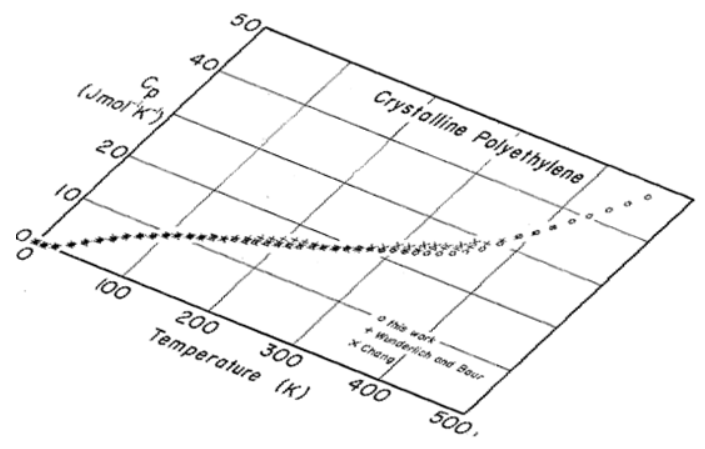

Complete as in previous homework. The calibration routine will remove the rotation and skew in the above image automatically.  

### Homework Problem 2:
<hr style="height:2px">

How can we handle log-linear plots?  Our transformation is only a linear transformation.  Hint:  Don't use a log axis on the y-axis but transform your data first. So for example, calibration point (1.70, $10^{-13}$) should be taken as (1.70, -13).  

Reproduce the plot below.  Use separate data sets for the two different types of points. Label your axes.   
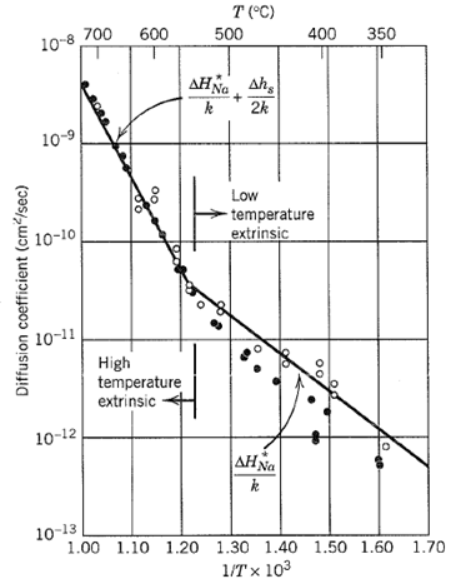

Fig caption: Diffusion coefficients measured directly (open circles) and calculated from the electical conductivity data (closed circles) for $(Na)^+$ in sodium chloride. At the break in the curves between the two regimes, the concentration of intrinsic vacancies equals that due to the extrinsic dopant. From "Physical Ceramics", Chiang, Birnie, and Kingery, John Wiley & Sons (1997), pg 202.

<IPython.core.display.Javascript object>


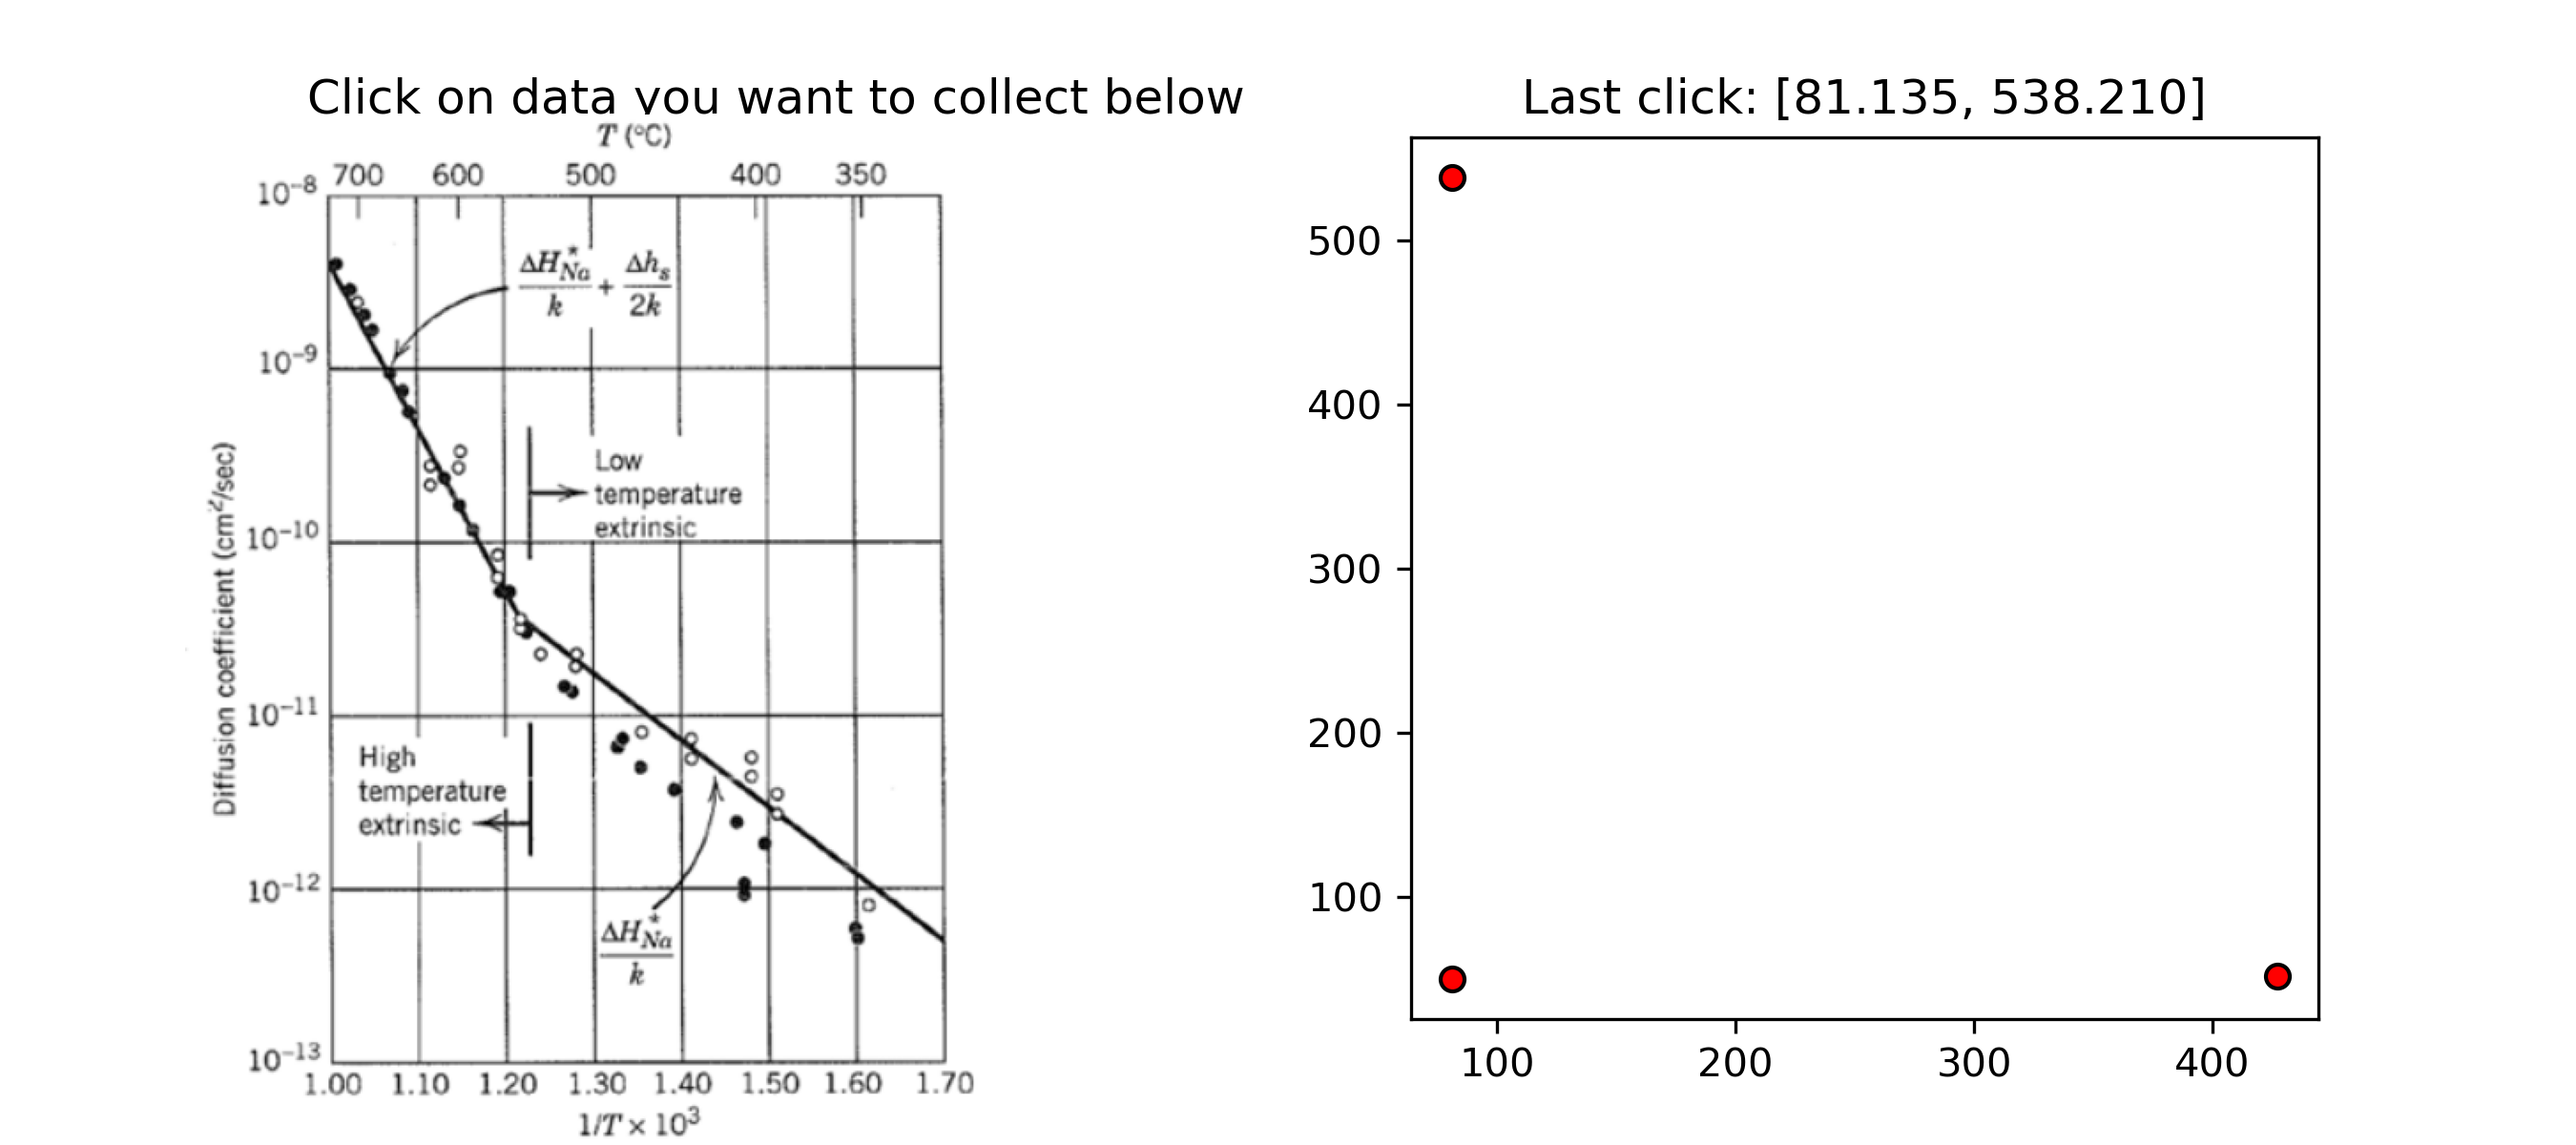

In [4]:
path=r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\images"
filename='hw image 2.png'
fullpath=os.path.join(path, filename)

selectdata(fullpath)

In [5]:
# we have a linear calibration so we want to take the log of the y axis when defining our calib
# notice the y values of pixpts are the log values e.g. now we use -13 and not 10^-13
pixpts=pixel_positions #correspond to plot points: [[1.70, -13], [1,-13],[1,-8]]
display(pixpts)
plotpts=[[1.70, -13], [1,-13],[1,-8]]
display(plotpts)

[[427.1014592488607, 51.59341100056963],
 [81.134792582194, 49.97674433390296],
 [81.134792582194, 538.2100776672363]]

[[1.7, -13], [1, -13], [1, -8]]

<IPython.core.display.Javascript object>


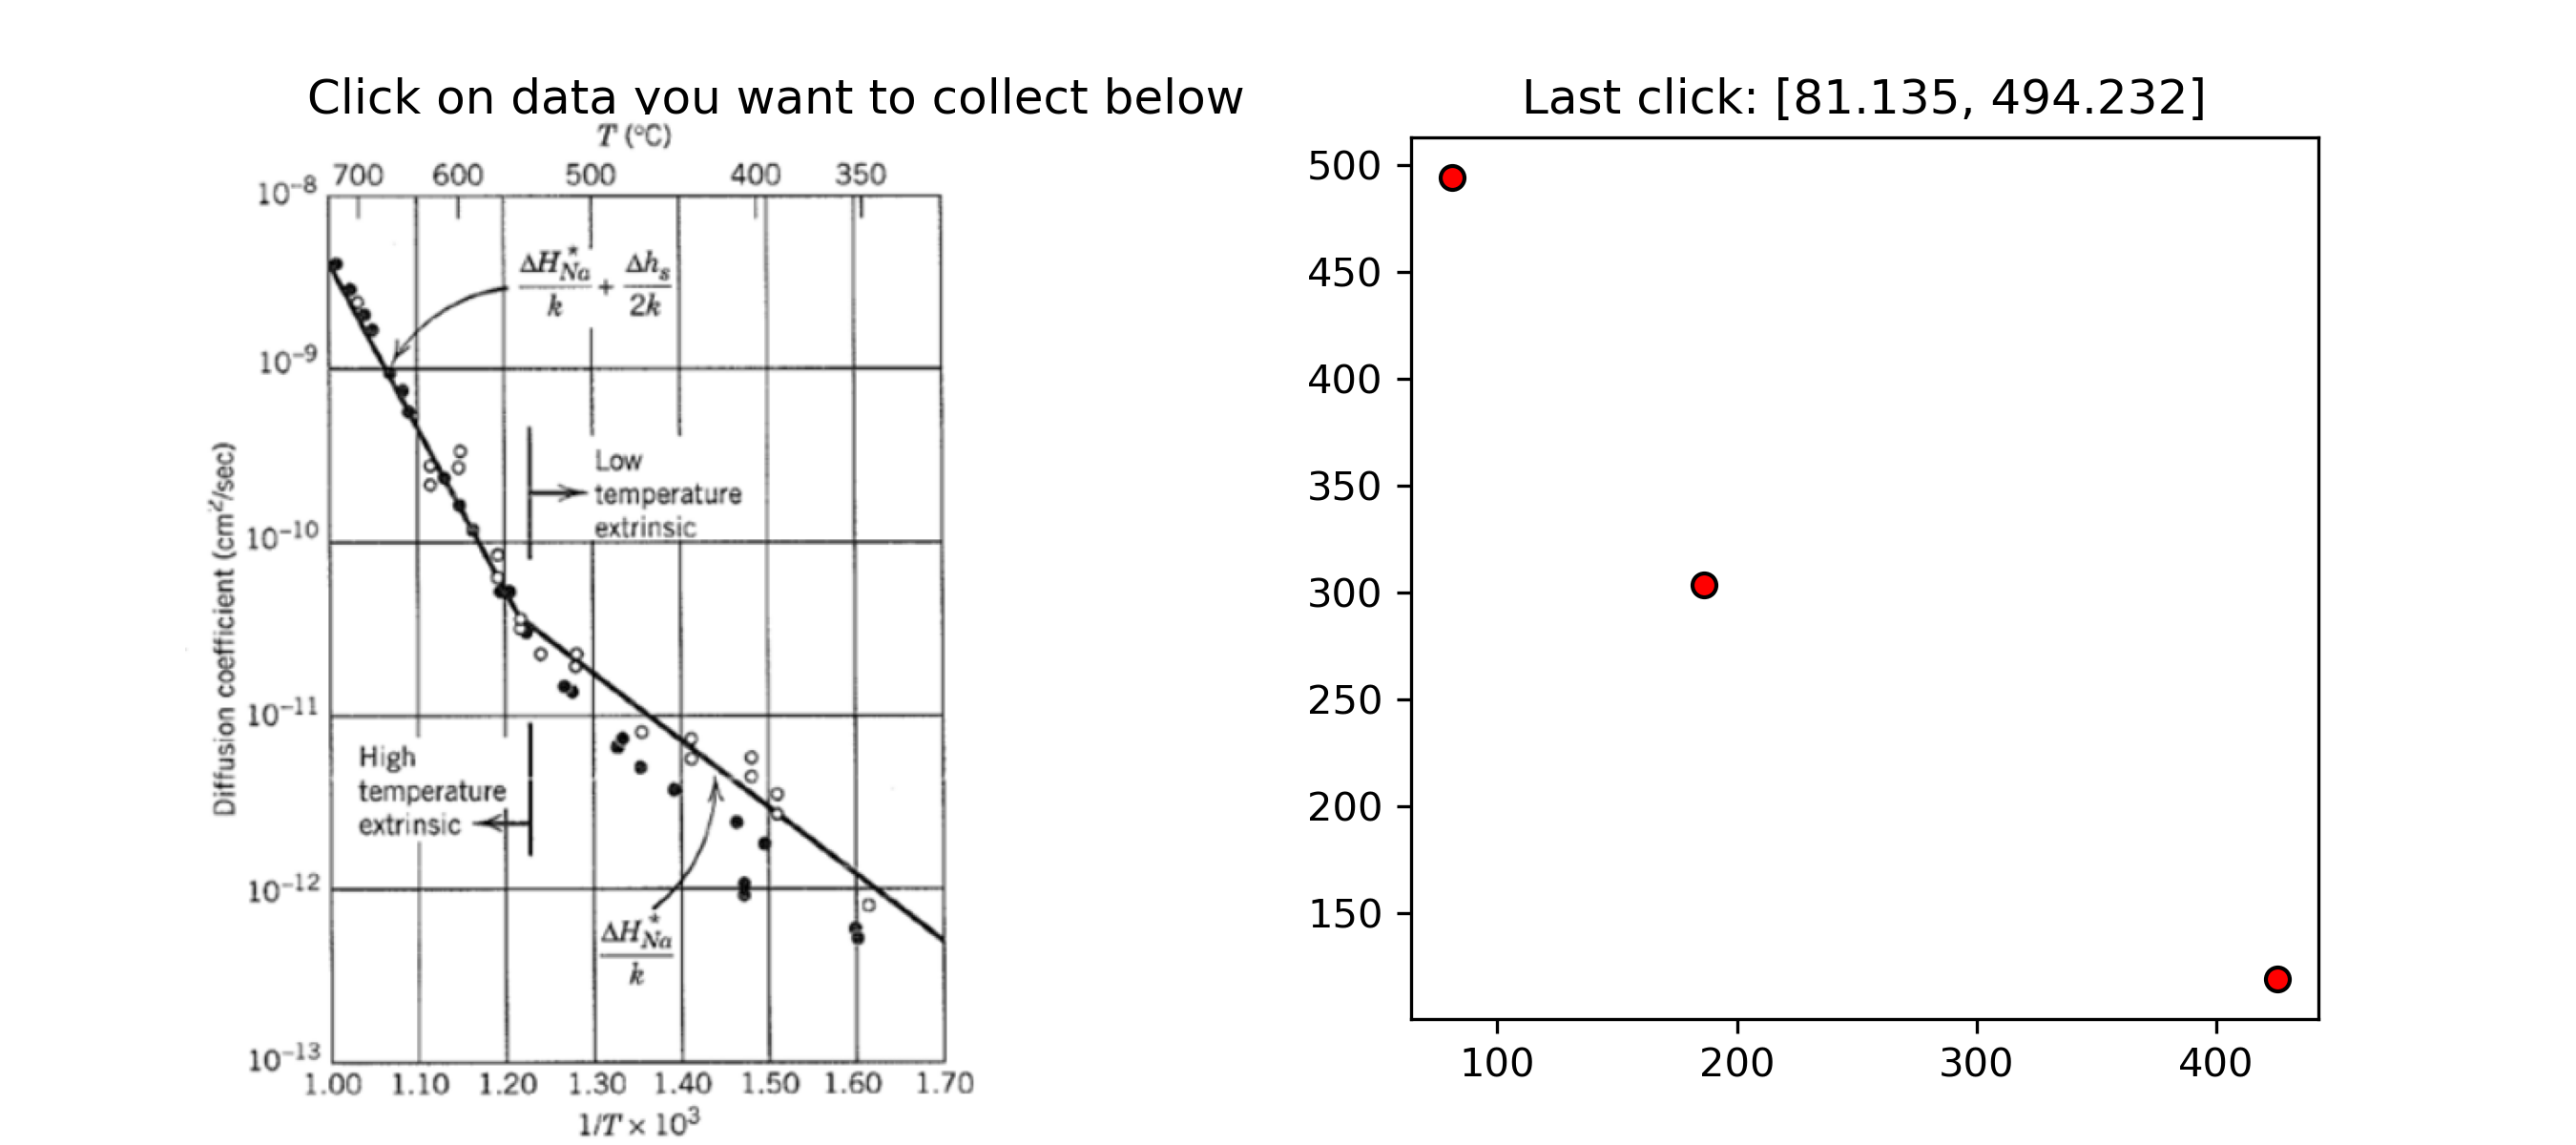

In [6]:
selectdata(fullpath)

In [7]:
datatoconvert=pixel_positions
plotdata=cal(pixpts,plotpts,datatoconvert)
plotdata

array([[  1.69672897, -12.30792139],
       [  1.21261682, -10.40905403],
       [  1.        ,  -8.45038286]])

<IPython.core.display.Javascript object>


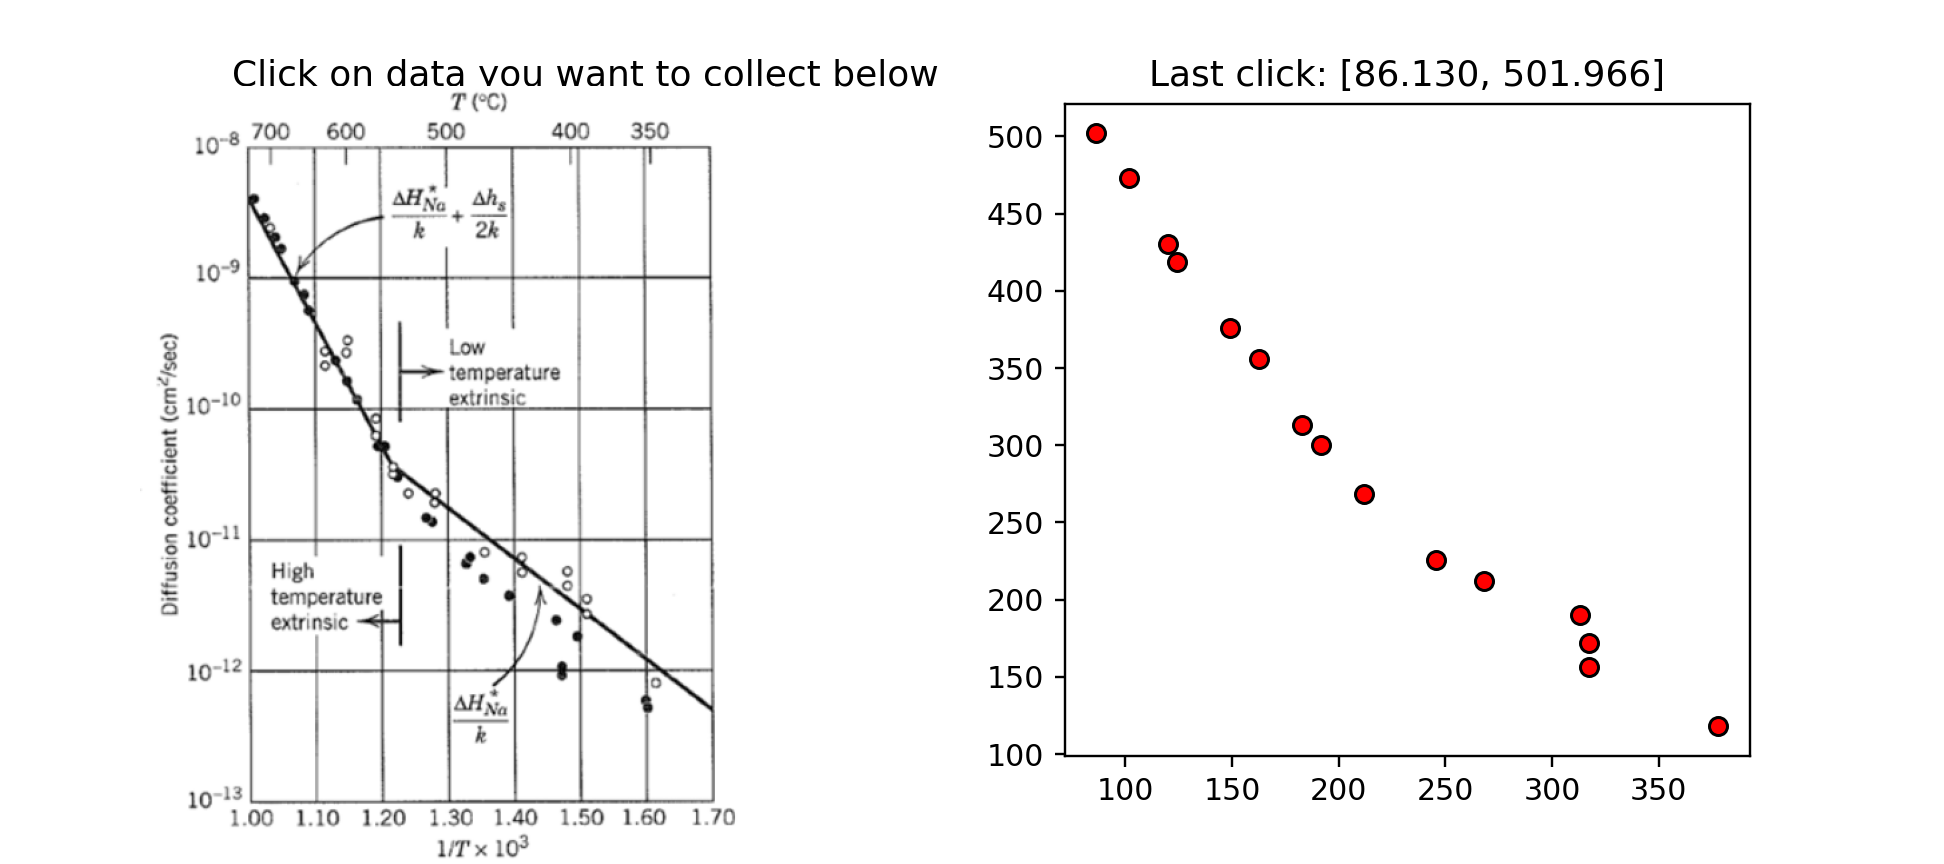

In [11]:
selectdata(fullpath)

In [14]:
filled=pixel_positions

plotdata2=cal(pixpts,plotpts,filled)
plotdata2

array([[  1.60070971, -12.31750214],
       [  1.47804616, -11.92368848],
       [  1.47804616, -11.76272454],
       [  1.46895997, -11.57855084],
       [  1.37809808, -11.3464533 ],
       [  1.33266714, -11.20740968],
       [  1.26452072, -10.76889576],
       [  1.22363287, -10.44600079],
       [  1.20546049, -10.30760189],
       [  1.16457264,  -9.86973268],
       [  1.13731407,  -9.66213432],
       [  1.08734003,  -9.22405021],
       [  1.07825384,  -9.10886106],
       [  1.04190909,  -8.67109931],
       [  1.01010743,  -8.3714141 ]])

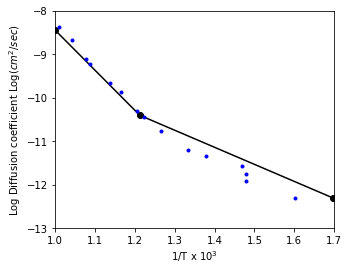

In [15]:
%matplotlib inline
fig,ax=plt.subplots(figsize=[5,4])
ax.plot(plotdata[:,0], plotdata[:,1], 'ko-')
ax.plot(plotdata2[:,0], plotdata2[:,1], 'b.')
ax.set_xlabel('1/T x $10^3$')
ax.set_ylabel('Log Diffusion coefficient Log($cm^2 / sec$)') # we are plotting the log of the data
ax.set_xlim(1.0, 1.7)
ax.set_ylim(-13,-8) #notice our y axis is now linear -- the log of the data has already been taken
plt.show()

### Homework Problem 3: Find the glass transition temperature
<hr style="height:2px">

Reproduce the points shown in the plot below. The glass transition temperature corresponds to the inflection point on the curve.  This point is the point of maximum slope.  To determine the glass transition temperature take the derivative of your data and find the point of maximum derivative.  

Hints: The slope is simply the difference in the y-values of two neighboring points divided by the difference in the x-values.  You might take a look at numpy.diff().  

Note: Don't forget that since you are taking the difference between two neighboring points, your x-axis for each point has shifted to a value that is the average of the two.  This is called a moving average.  You may have to write a short function to take care of this.  

Your new slope data and your new x data will both have a length one less than the original data set.  

What you need to show: 
(a) plot of data in figure below
(b) plot of the derivative of this data versus temperature
(c) identify the glass transition temperature as the maximum in the curve

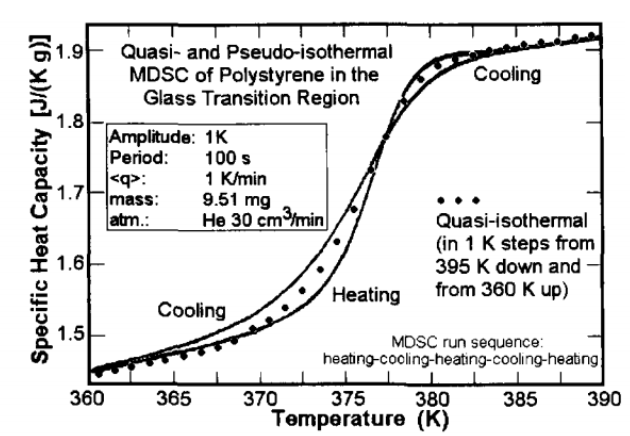

MDSC plot of polystyrene measuring the glass transition as changes in heat capacity as a function of temperature using either a heating or cooling rate as indicated by the solid lines. The dotted line indicates a quasi-isothermal measurement of the glass transition of polystyrene. Adapted from L. C. Thomas, A. Boller, I. Okazaki, and B. Wunderlich, Thermochim. Acta, 1997, 291, 85.

<IPython.core.display.Javascript object>


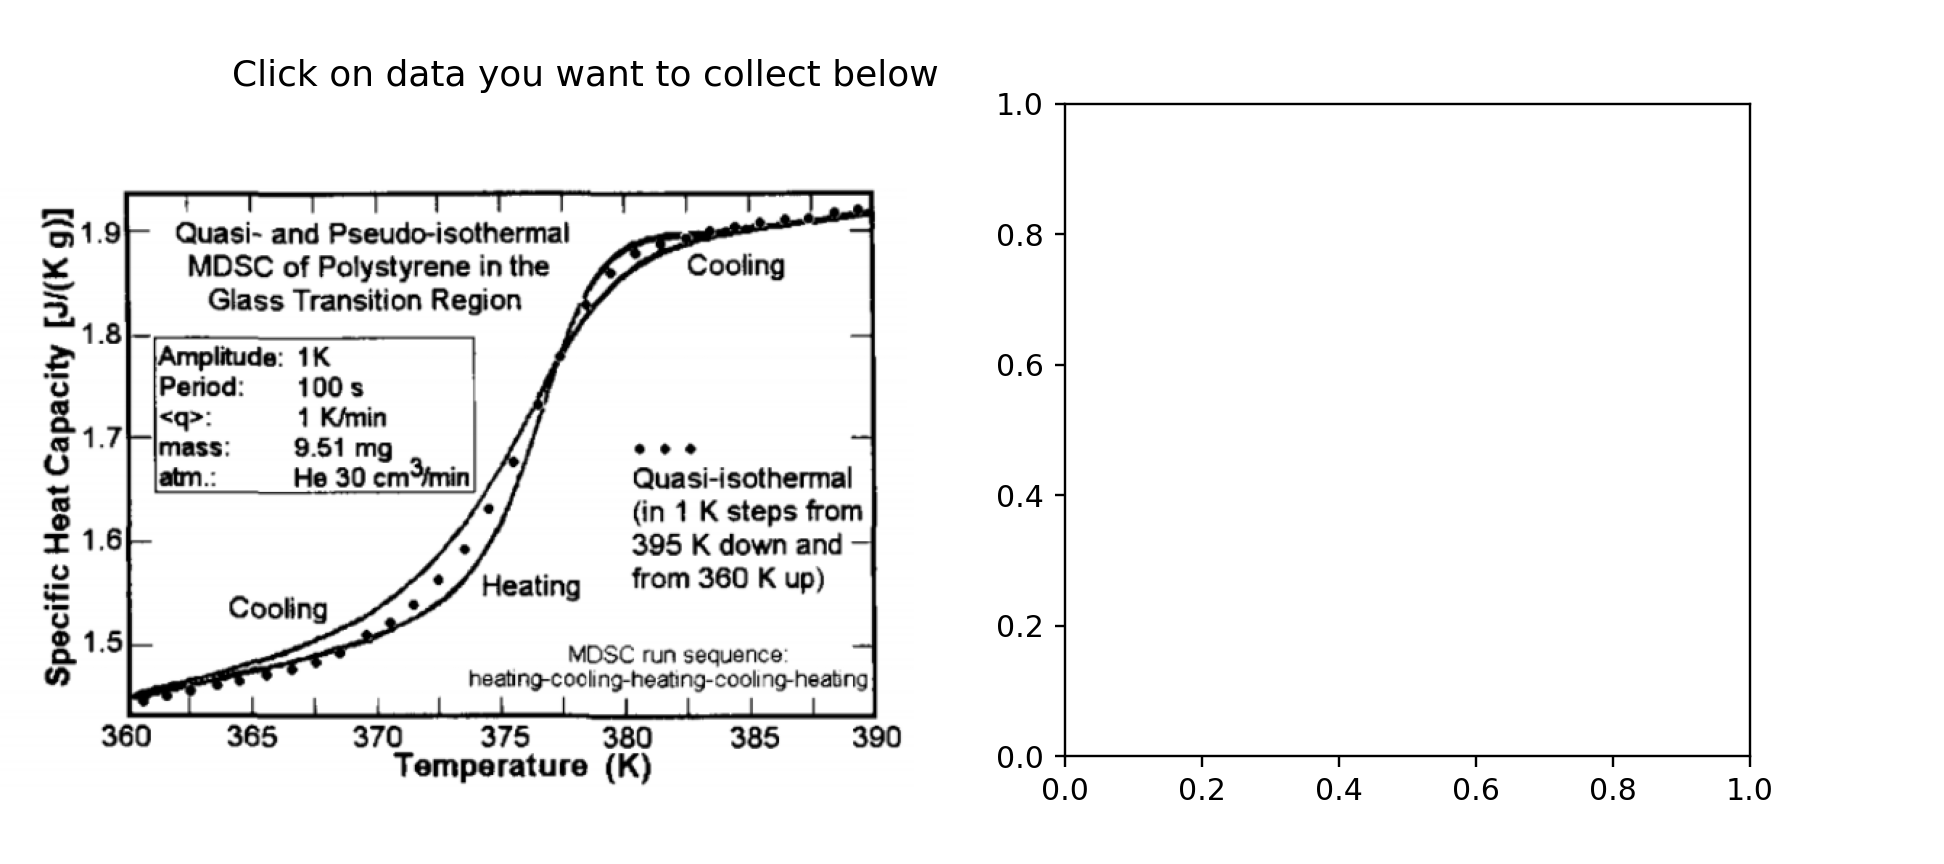

In [35]:
path=r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\images"
filename='hw image 3.png'
fullpath=os.path.join(path, filename)

selectdata(fullpath)

In [18]:
datatoconvert=pixel_positions
datatoconvert
# note:  this data is in pixel units!  You still need to convert this to plot units.  
# I'm going to use this data however to show the concept of how to find the slope
# Apply this concept to the converted data.  

[[101.04247058480625, 69.3785319948309],
 [130.00228145951075, 77.6527636733179],
 [187.92190320891973, 85.92699535180492],
 [243.77296703870695, 102.47545870877889],
 [295.4869150292507, 135.57238542272688],
 [343.06374718055093, 203.83479677024462],
 [372.0235580552554, 259.68586060003184],
 [396.8462530907164, 336.2225036260366],
 [429.9431798046644, 373.4565461792281],
 [471.3143381970994, 383.7993357773368],
 [516.8226124287779, 396.2106832950673],
 [554.0566549819694, 400.34779913431083],
 [576.8107920978086, 402.4163570539326],
 [597.4963712940261, 406.5534728931761]]

In [19]:
len(datatoconvert)

14

In [20]:
y=datatoconvert[:,1] #why does this not work here?  Because datatoconvert is not a numpy array.
y

TypeError: list indices must be integers or slices, not tuple

In [21]:
# since your data will be in plot units it will have been converted to a numpy array
# so you won't need this extra step
y=np.array(datatoconvert)[:,1]
y

array([ 69.37853199,  77.65276367,  85.92699535, 102.47545871,
       135.57238542, 203.83479677, 259.6858606 , 336.22250363,
       373.45654618, 383.79933578, 396.2106833 , 400.34779913,
       402.41635705, 406.55347289])

In [22]:
# we want the difference in y values for example
y[1]-y[0] 

8.274231678487013

In [24]:
# in this case I selected 14 data points y[0] to y[13]
# the last point would therefore be
y[13]-y[12]

4.137115839243506

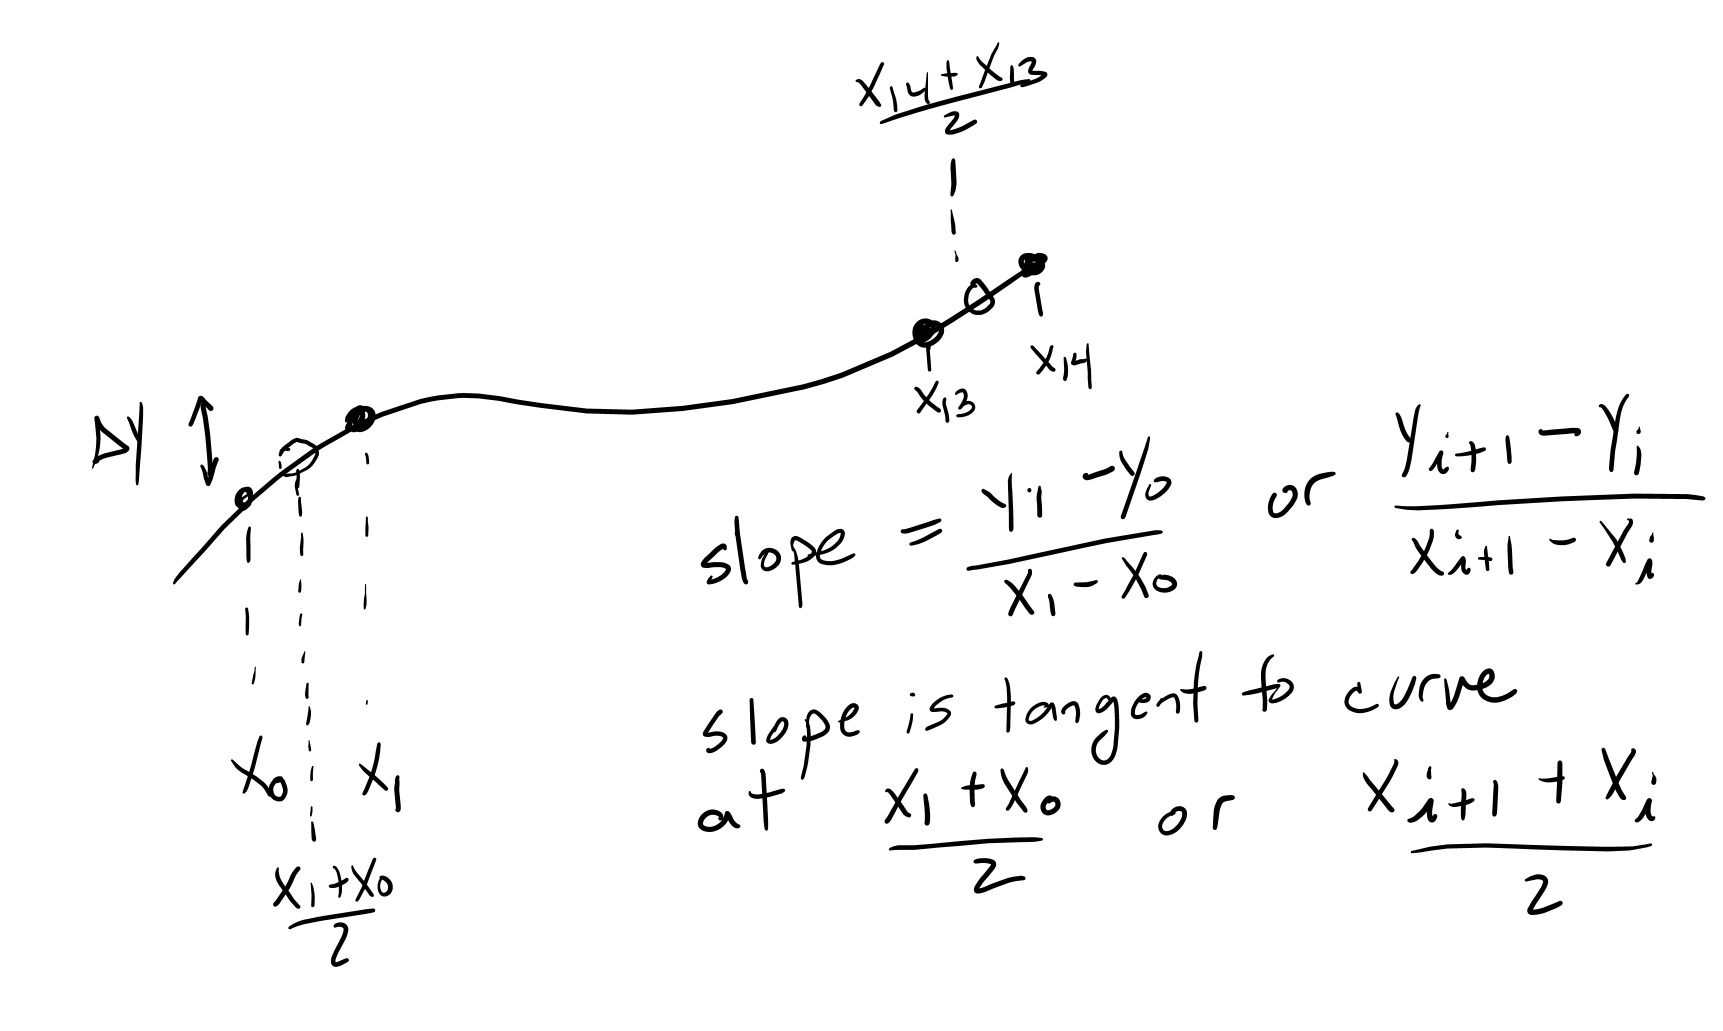

In [26]:
# recall np.arange()
np.arange(len(y)-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [27]:
ydiff=[y[i+1]-y[i] for i in np.arange(len(y)-1)] #get 1 fewer points output than our input array
ydiff
# still need xdiff as well so that we can calculate:
# slope=ydiff/xdiff

[8.274231678487013,
 8.274231678487013,
 16.54846335697397,
 33.096926713947994,
 68.26241134751774,
 55.85106382978722,
 76.53664302600475,
 37.2340425531915,
 10.342789598108709,
 12.411347517730519,
 4.137115839243506,
 2.068557919621753,
 4.137115839243506]

In [37]:
print(len(y))
len(ydiff)

14


13

In [28]:
# now plot x position for each slope value i.e. at the average position between two points
#  e.g. xvalues=[(x[i+1]+x[i])/2 for i in np.arange(len(x)-1)]
# make sure your x values and slope values have the same length -- they should if done correctly.
x=np.array(datatoconvert)[:,0]
xpos=[(x[i+1]+x[i])/2 for i in np.arange(len(x)-1)]
xpos

[115.52237602215851,
 158.96209233421524,
 215.84743512381334,
 269.62994103397887,
 319.27533110490083,
 357.54365261790315,
 384.43490557298594,
 413.39471644769037,
 450.6287590008819,
 494.06847531293863,
 535.4396337053736,
 565.433723539889,
 587.1535816959174]

In [ ]:
len()

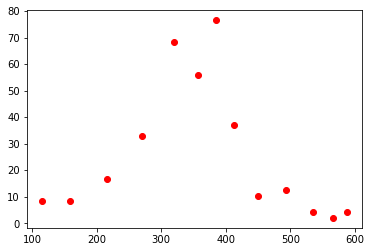

In [38]:
%matplotlib inline
plt.plot(xpos, np.array(ydiff),'ro')
plt.show()